## **Plotting**

We are going to use:

* matplotlib
* seaborn

In [1]:
## imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Inventory
import numpy as np

inv_A = np.random.randint(0, 20, 50)
inv_B = np.random.randint(0, 10, 50)

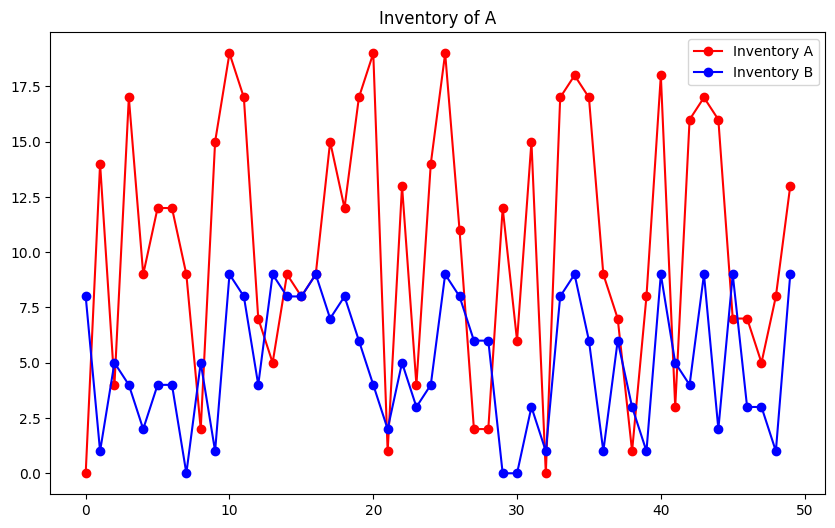

In [9]:
## Line plot
plt.figure(figsize = (10, 6))
plt.plot(inv_A, marker = 'o', color = "red", label = "Inventory A")
plt.plot(inv_B, marker = 'o', color = "blue", label = "Inventory B")
plt.title("Inventory of A")
plt.legend()
plt.show()

<Axes: >

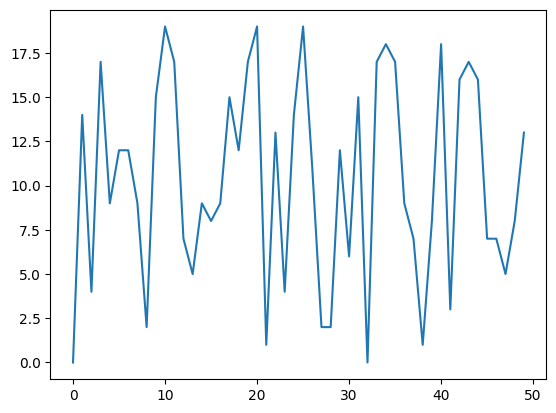

In [11]:
## Seaborn
sns.lineplot(inv_A)

#### **Histogram**

For a single numeric. Let's use `plt.hist()`

In [12]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/customer_churn.csv')
df.head()

,CustomerId,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [13]:
## set an index
df.set_index('CustomerId', inplace = True)
df.head()

,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
CustomerId,,,,,,,,,,,,
15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [14]:
## Locate
df.loc[15740175]

,15740175
Lastname,Raynor
CreditScore,732
Geography,Germany
Gender,Female
Age,42
Tenure,2
Balance,118889.66
NumOfProducts,2
HasCrCard,0
IsActiveMember,0


Text(0.5, 1.0, 'Histogram of Credit Scores')

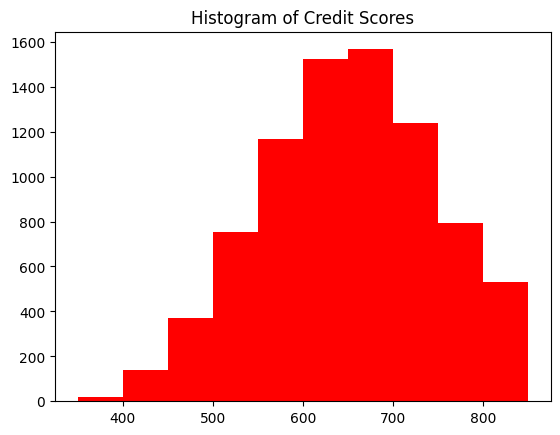

In [18]:
## Histograms
plt.hist(df.CreditScore, color = "red")
plt.title("Histogram of Credit Scores")

<Axes: xlabel='Balance', ylabel='Count'>

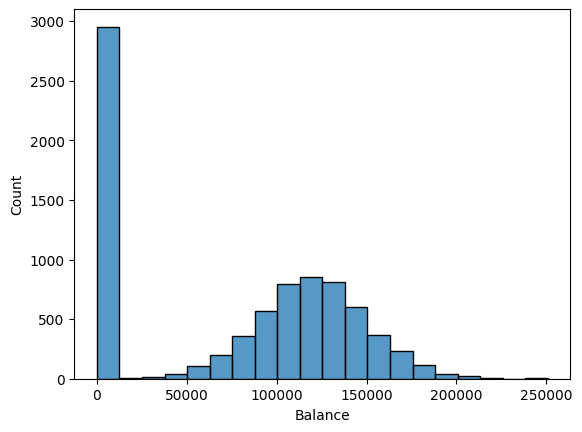

In [19]:
## Seaborn
sns.histplot(data = df, x = "Balance")

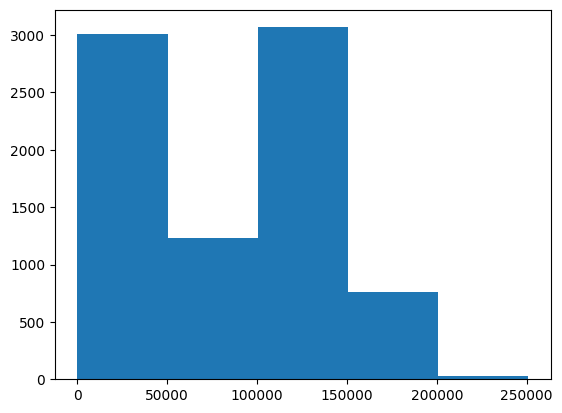

In [22]:
plt.hist(df.Balance, bins = 5);

#### **Boxplot**

Useful to detect outliers in a single numeric variable.

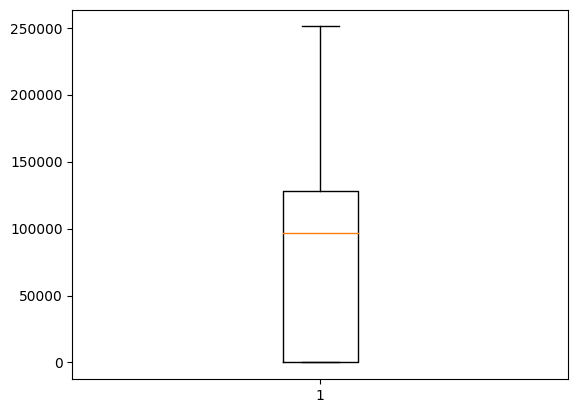

In [24]:
plt.boxplot(df['Balance']);

<Axes: ylabel='Balance'>

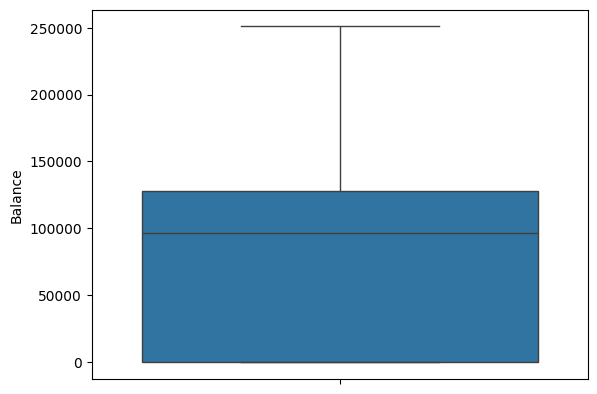

In [25]:
sns.boxplot(df['Balance'])

#### **Scatter Plots**

Relationship between two numeric predictors.

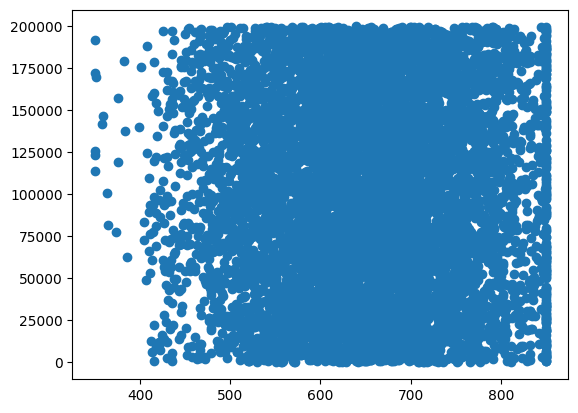

In [26]:
plt.scatter(df.CreditScore, df.EstimatedSalary);

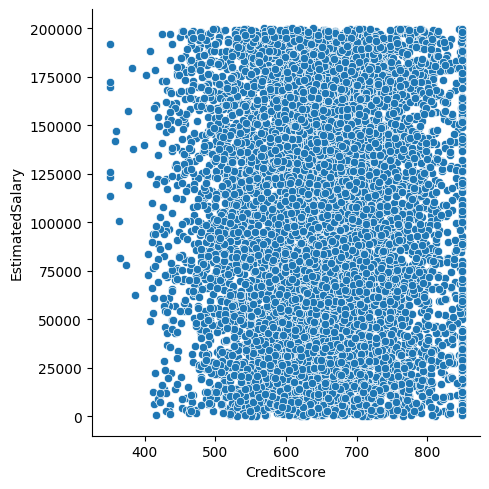

In [27]:
sns.relplot(data = df, x = 'CreditScore', y = 'EstimatedSalary')

#### **Multi-plots**

You can combine multiple plots into one.

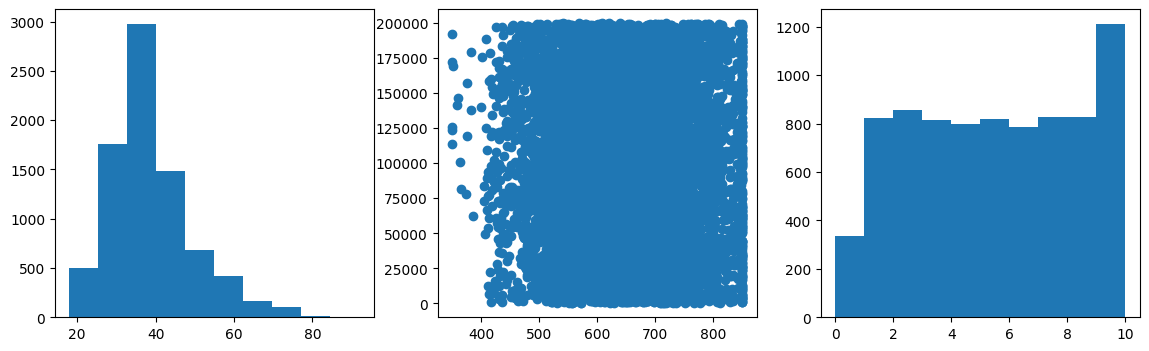

In [30]:
## sets the figure size (wider)
plt.figure(figsize = (14,4))

## plot 1
## 1 row, 3 plots
plt.subplot(1,3,1)
plt.hist(df['Age'])

plt.subplot(1,3,2)
plt.scatter(df.CreditScore, df.EstimatedSalary)

plt.subplot(1,3,3)
plt.hist(df.Tenure)

plt.show()

## **Object-Oriented Programming**

When we want to create objects that have functionality, we can consider creating classes of objects. We can add:

* methods: functions that are attached
* attributes: values, constants that do not require calculations

In [59]:
## Create a Car class
class Car:
  ## attribute (fixed, not given by the user)
  wheels = "four"
  ## attributes (input by the user)
  def __init__(self, model, color, mpg):
    self.model = model
    self.color = color

  ## methods (do not require parameters)
  def brake(self):
    print("The car now is breaking")

  ## method (requires a parameter)
  def accelerate(self, speed):
    print(f"The car is accelerating to speed {speed}MPH")

  ## method (requires but creates an attribute)
  def kpg_calc(self):
    self.kpg = self.mpg*1.61

In [60]:
## make a new car
## making an instance, instantiating
mycar = Car("Camry", "red", 30)

In [61]:
## color
mycar.mpg

AttributeError: 'Car' object has no attribute 'mpg'

In [62]:
## wheels
mycar.wheels

'four'

In [41]:
mycar.brake()

The car now is breaking


In [43]:
mycar.accelerate(80)

The car is accelerating to speed 80MPH


In [45]:
mycar.kpg_calc()

In [46]:
mycar.kpg

48.300000000000004

## **Example with Linear Regression**

In [47]:
df1 = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/Analyst_SalaryData.csv')
df1.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [49]:
## create the X matrix with predictors
X = df1.drop('Salary', axis = 1)
y = df1.Salary

In [54]:
## To fit most models (linear regression)

## 1) make an instance of the model object
from sklearn.linear_model import LinearRegression

mymodel = LinearRegression()

## 2) call the method that fits the model (usually .fit())
mymodel.fit(X,y)

## 3) predict new observations (usually .predict() )
predictions = mymodel.predict(X)

## 4) might get some attributes (e.g., slope, intercept, R2, )
mymodel.coef_

array([6153.35330145, 1836.01359426])

In [55]:
mymodel.intercept_

-6661.987198813076

In [57]:
## To fit a random forest

## 1) make an instance of the model object
from xgboost import XGBRegressor

mymodel = XGBRegressor()

## 2) call the method that fits the model (usually .fit())
mymodel.fit(X,y)

## 3) predict new observations (usually .predict() )
predictions = mymodel.predict(X)

In [58]:
predictions

array([ 39343.652,  46204.254,  37731.664,  43524.363,  39891.676,
        56642.12 ,  60149.19 ,  59445.062,  59445.062,  57190.105,
        63217.02 ,  56375.85 ,  56375.85 ,  57080.902,  61111.28 ,
        67936.47 ,  66030.16 ,  83087.   ,  81364.125,  93938.914,
        91739.375,  98272.836, 101301.805, 113810.56 , 109431.03 ,
       105583.13 , 116968.15 , 112635.9  , 122390.08 , 121872.16 ],
      dtype=float32)